# 1. Load the data

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#sử dụng StandardScaler để chuẩn hóa các đặc trưng của tập huấn luyện và tập kiểm tra. Bằng cách này, sẽ đảm bảo rằng các đặc trưng có cùng phạm vi, giúp mô hình học tốt hơn.

# 2.Visualisation of the dataset

c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


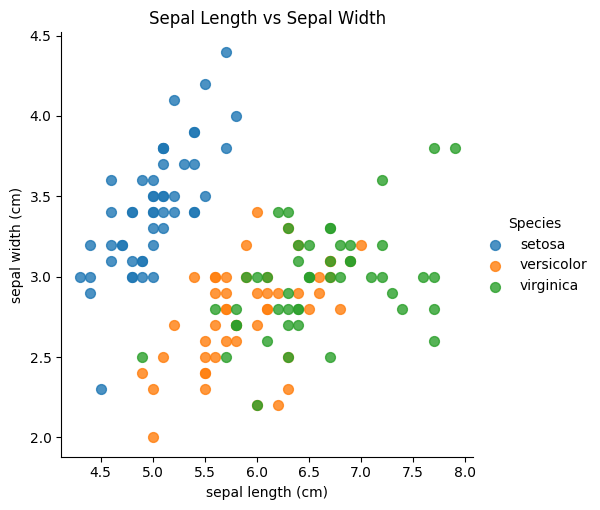

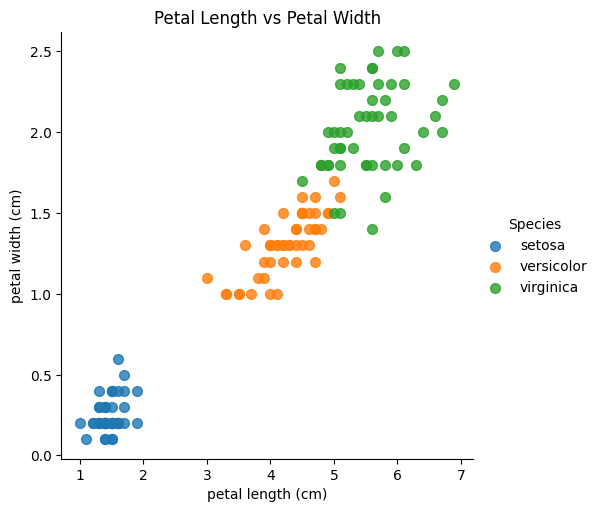

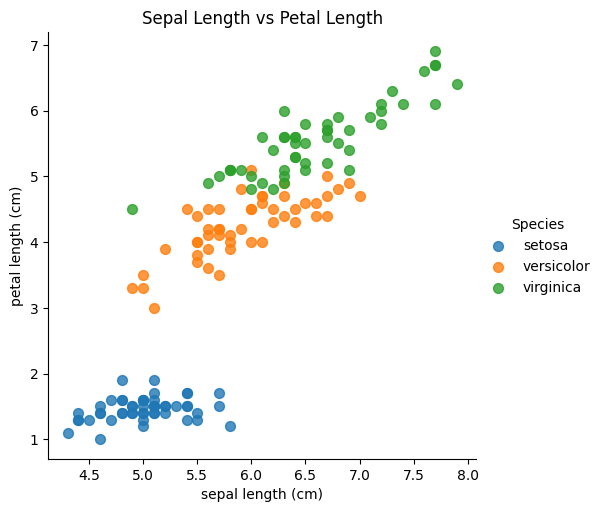

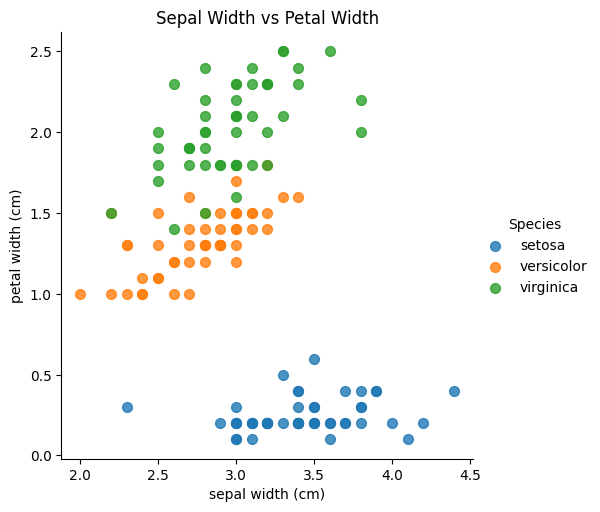

In [26]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X['Species'] = iris.target_names[iris.target]

# Visualize data
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)',
           data=X,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Sepal Length vs Sepal Width')

sns.lmplot(x='petal length (cm)', y='petal width (cm)',
           data=X,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Petal Length vs Petal Width')

sns.lmplot(x='sepal length (cm)', y='petal length (cm)',
           data=X,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Sepal Length vs Petal Length')

sns.lmplot(x='sepal width (cm)', y='petal width (cm)',
           data=X,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Sepal Width vs Petal Width')

plt.show()


Có thể thấy rằng mỗi loài Iris đều có thể được phân chia thành các vùng khác nhau để dự đoán.

# 3. FNN model for regression

In [24]:
# Build and train FNN model for regression
regression_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

regression_model.compile(optimizer='adam', loss='mean_squared_error')

regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate model on test set for regression task
y_pred_regression = regression_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_regression)
print("Mean Squared Error (Regression):", mse)


c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Mean Squared Error (Regression): 0.046469382349625984


In [27]:
regression_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

Trong bước này, chúng ta xây dựng một mô hình FNN cho nhiệm vụ dự báo. Mô hình có hai lớp ẩn với 64 nơ-ron mỗi lớp và hàm kích hoạt ReLU. Chúng ta sử dụng hàm mất mát là mean squared error (MSE) và optimizer là Adam để huấn luyện mô hình trên tập dữ liệu huấn luyện.

# 4. FNN model for classification

In [25]:
# Build and train FNN model for classification
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with softmax activation for classification
])

classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

classification_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate model on test set for classification task
y_pred_classification = np.argmax(classification_model.predict(X_test_scaled), axis=-1)
accuracy = accuracy_score(y_test, y_pred_classification)
print("Accuracy (Classification):", accuracy)


c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Accuracy (Classification): 1.0


In [29]:
classification_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,027 (54.80 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,352 (36.54 KB)

Trong bước này, chúng ta xây dựng một mô hình FNN cho nhiệm vụ phân loại. Mô hình có hai lớp ẩn với 64 nơ-ron mỗi lớp và hàm kích hoạt ReLU. Lớp đầu ra sử dụng hàm kích hoạt softmax để tính xác suất của từng lớp. Chúng ta sử dụng hàm mất mát là sparse categorical crossentropy và metric là accuracy để huấn luyện mô hình và đánh giá hiệu suất trên tập dữ liệu kiểm tra.